# Import package

In [1]:
import os
import time
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import random
from IPython import display
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ['TF_DETERMINISTIC_OPS'] = '1'

In [2]:
def set_seed(seed=200):
    tf.random.set_seed(seed)

    # optional
    # for numpy.random
    np.random.seed(seed)
    # for built-in random
    random.seed(seed)
    # for hash seed
    os.environ["PYTHONHASHSEED"] = str(seed)

In [3]:
set_seed(5714)

# Testing paramemter setting

In [4]:
lr = 2e-5
EPOCHS = 60000
LAMBDA = 10

# Delet old checkpoint

In [5]:
!rm -rf ./checkpoints/train/*

# Import training data

In [6]:
microarray = pd.read_csv("./0.Microarray_training_data.csv", index_col = 0)
microarray = microarray.transpose()

In [7]:
microarray

200602_at  200665_s_at  200696_s_at  200771_at  200783_s_at  \
GSM1070753   5.385719     3.233059     5.638161   3.666221     9.030139   
GSM1070754   6.166683     3.319784     5.640654   3.770027     7.026058   
GSM1070755   5.641412     3.155164     5.341850   3.534763     9.382829   
GSM1070756   6.710634     3.465733     5.452546   3.823823     7.177621   
GSM1070757   6.263471     3.350585     5.960571   3.827039     8.627886   
...               ...          ...          ...        ...          ...   
GSM592987    3.859517     5.489644     5.936726   3.408128     4.826513   
GSM592988    7.795012     7.048716     6.407633   3.603467     6.249383   
GSM592989    4.230451     6.242650     6.266402   3.684361     5.500962   
GSM592990    3.579648     6.560203     6.267596   3.665075     5.007389   
GSM592991    3.775814     6.300705     5.488925   3.566884     7.515102   

            200796_s_at  200832_s_at  200850_s_at  200862_at  200878_at  ...  \
GSM1070753     9.147838     9.768519     9.262188   8.678277   6.407633  ...   
GSM1070754     8.374608     8.463668     8.848955   5.614246   7.114929  ...   
GSM1070755     8.169531    10.295716     9.258073   8.421861   8.280615  ...   
GSM1070756     8.978661     9.305581     9.598916   6.306017   9.199433  ...   
GSM1070757     8.810802     9.092778     9.772384   8.562646   7.371492  ...   
...                 ...          ...          ...        ...        ...  ...   
GSM592987      4.819464     6.340942     4.304337   4.244506   3.225409  ...   
GSM592988      5.550037     7.879972     5.025414   4.944807   3.786669  ...   
GSM592989      4.968060     7.474036     6.414366   4.375331   3.168679  ...   
GSM592990      4.545162     6.821083     4.766444   4.709478   3.367438  ...   
GSM592991      5.092148     8.765808     5.169559   5.000629   3.487118  ...   

            37793_r_at  38241_at   39248_at  41644_at  47553_at  49306_at  \
GSM1070753    5.148425  8.201522   9.414783  5.956052  5.565777  3.722018   
GSM1070754    4.658571  5.835458   5.239223  6.162004  6.078516  3.787734   
GSM1070755    5.305583  8.626626   5.087094  5.402161  4.947471  4.072910   
GSM1070756    4.762457  6.780174   6.428133  5.808501  6.054938  3.506507   
GSM1070757    4.694312  7.038270   8.959741  6.708454  5.610478  4.236852   
...                ...       ...        ...       ...       ...       ...   
GSM592987     5.376140  5.520117   9.072696  5.180409  4.129187  2.903513   
GSM592988     5.204098  7.348413  10.194641  5.295931  3.822967  3.144853   
GSM592989     6.320138  9.561423   9.601831  4.863767  3.974094  3.283414   
GSM592990     5.496193  7.834352   8.116315  5.151882  4.146459  2.936972   
GSM592991     6.681855  7.983004  10.140365  4.981971  3.968995  2.883825   

            49452_at  52285_f_at  58780_s_at  87100_at  
GSM1070753  4.980739    7.635963    3.826036  5.579211  
GSM1070754  4.252766    7.145932    4.312207  6.187043  
GSM1070755  5.609719    7.633260    4.052685  5.670313  
GSM1070756  4.103647    7.686770    3.594720  4.814122  
GSM1070757  4.318141    7.610722    3.976377  5.431798  
...              ...         ...         ...       ...  
GSM592987   4.949380    2.729864    4.417782  8.702256  
GSM592988   6.888548    2.592861    4.624621  8.470282  
GSM592989   8.453897    4.286878    5.710996  8.570958  
GSM592990   9.240588    2.671141    5.574750  8.868535  
GSM592991   7.983363    2.598761    3.874081  8.072502  

[414 rows x 1000 columns]

In [8]:
scRNA = pd.read_hdf("./15.Train.h5")
scRNA = scRNA.transpose()

In [9]:
scRNA

ENSG00000000938  ENSG00000002549  ENSG00000002586  \
ACAATCCTCGAACT-1_1                 0.0              0.0              1.0   
GTTAAATGACGGTT-1_1                 0.0              0.0              0.0   
TCGCACACGTCGAT-1_1                 0.0              0.0              1.0   
GCCGACGAATCGAC-1_1                 0.0              0.0              0.0   
TAATCCACTGAAGA-1_1                 0.0              0.0              1.0   
...                                ...              ...              ...   
GAGTCCGGTATCACCA-1_15              3.0              0.0              3.0   
AGGGTGACACCAACCG-1_15              1.0              0.0              1.0   
GGATGTTCACGGCTAC-1_15              2.0              0.0              3.0   
CACCTTGTCATTTGGG-1_15              2.0              0.0              0.0   
CACAGGCAGTGAACGC-1_15              0.0              0.0              0.0   

                       ENSG00000005022  ENSG00000007264  ENSG00000007312  \
ACAATCCTCGAACT-1_1                 1.0              0.0              0.0   
GTTAAATGACGGTT-1_1                 2.0              0.0              0.0   
TCGCACACGTCGAT-1_1                 3.0              0.0              0.0   
GCCGACGAATCGAC-1_1                 1.0              0.0              0.0   
TAATCCACTGAAGA-1_1                 1.0              0.0              0.0   
...                                ...              ...              ...   
GAGTCCGGTATCACCA-1_15              1.0              1.0              0.0   
AGGGTGACACCAACCG-1_15              0.0              0.0              0.0   
GGATGTTCACGGCTAC-1_15              2.0              0.0              1.0   
CACCTTGTCATTTGGG-1_15              3.0              0.0              0.0   
CACAGGCAGTGAACGC-1_15              0.0              0.0              0.0   

                       ENSG00000008018  ENSG00000008282  ENSG00000008517  \
ACAATCCTCGAACT-1_1                 0.0              0.0              7.0   
GTTAAATGACGGTT-1_1                 0.0              0.0              0.0   
TCGCACACGTCGAT-1_1                 2.0              0.0              2.0   
GCCGACGAATCGAC-1_1                 3.0              1.0              0.0   
TAATCCACTGAAGA-1_1                 0.0              1.0              1.0   
...                                ...              ...              ...   
GAGTCCGGTATCACCA-1_15              2.0              0.0              0.0   
AGGGTGACACCAACCG-1_15              0.0              0.0              0.0   
GGATGTTCACGGCTAC-1_15              0.0              0.0              0.0   
CACCTTGTCATTTGGG-1_15              2.0              2.0              0.0   
CACAGGCAGTGAACGC-1_15              2.0              0.0              5.0   

                       ENSG00000008988  ...  ENSG00000244754  ENSG00000245532  \
ACAATCCTCGAACT-1_1                12.0  ...              1.0              1.0   
GTTAAATGACGGTT-1_1                 8.0  ...              0.0              0.0   
TCGCACACGTCGAT-1_1                 6.0  ...              0.0              0.0   
GCCGACGAATCGAC-1_1                 9.0  ...              0.0              0.0   
TAATCCACTGAAGA-1_1                 7.0  ...              0.0              1.0   
...                                ...  ...              ...              ...   
GAGTCCGGTATCACCA-1_15              1.0  ...              1.0              1.0   
AGGGTGACACCAACCG-1_15              2.0  ...              1.0              3.0   
GGATGTTCACGGCTAC-1_15              9.0  ...              1.0             19.0   
CACCTTGTCATTTGGG-1_15             10.0  ...              1.0              8.0   
CACAGGCAGTGAACGC-1_15             21.0  ...              2.0              1.0   

                       ENSG00000250479  ENSG00000251562  ENSG00000254999  \
ACAATCCTCGAACT-1_1                 0.0             53.0              0.0   
GTTAAATGACGGTT-1_1                 1.0             62.0              2.0   
TCGCACACGTCGAT-1_1                 0.0             59.0              1.0   
GCCGACG

# Data preprocessing

In [10]:
BUFFER_SIZE = 414
BATCH_SIZE = 32

In [11]:
Train_micro = np.array(microarray)
Train_scRNA = np.array(scRNA)
#print(Train_scRNA[0])

Train_scRNA = np.log2(Train_scRNA + 1) 
print(Train_scRNA[0])

In [12]:
print("Training microarry shape: {}".format(Train_micro.shape))
print("Training scRNA shape: {}".format(Train_scRNA.shape))

Training microarry shape: (414, 1000)
Training scRNA shape: (414, 1000)


In [13]:
Train_micro = Train_micro.reshape(Train_micro.shape[0], 1000).astype('float32')
Train_scRNA = Train_scRNA.reshape(Train_scRNA.shape[0], 1000).astype('float32')

In [14]:
print("Training microarry shape: {}".format(Train_micro.shape))
print("Training scRNA shape: {}".format(Train_scRNA.shape))

Training microarry shape: (414, 1000)
Training scRNA shape: (414, 1000)


In [15]:
# Batch and shuffle the data
Train_micro_dataset = tf.data.Dataset.from_tensor_slices(Train_micro).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
Train_scRNA_dataset = tf.data.Dataset.from_tensor_slices(Train_scRNA).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# Model construction

In [16]:
def make_mts_generator():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape = 1000))
    model.add(tf.keras.layers.Dense(512))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    
    model.add(tf.keras.layers.Dense(256))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    
    model.add(tf.keras.layers.Dense(128))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    
    model.add(tf.keras.layers.Dense(256))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Dense(512))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    
    model.add(tf.keras.layers.Dense(1000))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    return model

def make_stm_generator():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape = 1000))
    model.add(tf.keras.layers.Dense(512))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    
    model.add(tf.keras.layers.Dense(256))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    
    model.add(tf.keras.layers.Dense(128))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    
    model.add(tf.keras.layers.Dense(256))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Dense(512))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    
    model.add(tf.keras.layers.Dense(1000))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    
    return model

In [17]:
def make_micro_discriminator():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape = 1000))
    model.add(tf.keras.layers.Dense(512))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    
    model.add(tf.keras.layers.Dense(128))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    
    model.add(tf.keras.layers.Dense(32))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    
    model.add(tf.keras.layers.Dense(8))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    
    model.add(tf.keras.layers.Dense(1))

    
    return model

def make_scRNA_discriminator():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape = 1000))
    model.add(tf.keras.layers.Dense(512))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    
    model.add(tf.keras.layers.Dense(128))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    
    model.add(tf.keras.layers.Dense(32))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    
    model.add(tf.keras.layers.Dense(8))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    
    model.add(tf.keras.layers.Dense(1))
    
    return model

In [18]:
mts_generator = make_mts_generator()
stm_generator = make_stm_generator()
micro_discriminator = make_micro_discriminator()
scRNA_discriminator = make_scRNA_discriminator()

In [19]:
print(mts_generator.summary())
print(stm_generator.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               512512    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3

In [20]:
print(micro_discriminator.summary())
print(scRNA_discriminator.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               512512    
_________________________________________________________________
batch_normalization_12 (Batc (None, 512)               2048      
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_13 (Batc (None, 128)               512       
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)               

In [21]:
fake_scRNA = mts_generator(Train_micro[0].reshape(1, 1000), training = False)
decision = scRNA_discriminator(fake_scRNA, training = False)
print(decision)

tf.Tensor([[-0.10314057]], shape=(1, 1), dtype=float32)


In [22]:
fake_micro = stm_generator(fake_scRNA, training = False)
decision = micro_discriminator(fake_micro, training = False)
print(decision)

tf.Tensor([[-0.08729272]], shape=(1, 1), dtype=float32)


In [23]:
fake_micro = stm_generator(Train_scRNA[0].reshape(1, 1000), training = False)
decision = micro_discriminator(fake_micro, training = False)
print(decision)

tf.Tensor([[-1.0906758]], shape=(1, 1), dtype=float32)


# Define the loss and optimizers

Define loss functions and optimizers for both models.

In [24]:
# This method returns a helper function to compute cross entropy loss
loss_obj = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [25]:
def discriminator_loss(real, generated):

    real_loss = loss_obj(tf.ones_like(real), real)
    generated_loss = loss_obj(tf.zeros_like(generated), generated)
    total_disc_loss = real_loss + generated_loss
    
    return total_disc_loss * 0.5

In [26]:
def generator_loss(generated):
    return loss_obj(tf.ones_like(generated), generated)

In [27]:
def calc_cycle_loss(real_expr, cycled_expr):
    loss1 = tf.reduce_mean(tf.square(real_expr - cycled_expr))

    return LAMBDA * loss1

# Opitimizer setting

In [28]:
mts_generator_optimizer = tf.keras.optimizers.SGD(2e-4)
stm_generator_optimizer = tf.keras.optimizers.SGD(2e-4)
micro_discriminator_optimizer = tf.keras.optimizers.SGD(lr)
scRNA_discriminator_optimizer = tf.keras.optimizers.SGD(lr)

# Checkpoints

In [29]:
checkpoint_path = "./checkpoints/train"

ckpt = tf.train.Checkpoint(mts_generator = mts_generator,
                           stm_generator = stm_generator,
                           micro_discriminator = micro_discriminator,
                           scRNA_discriminator = scRNA_discriminator,
                           mts_generator_optimizer = mts_generator_optimizer,
                           stm_generator_optimizer = stm_generator_optimizer,
                           micro_discriminator_optimizer = micro_discriminator_optimizer,
                           scRNA_discriminator_optimizer = scRNA_discriminator_optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep = 2)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print ('Latest checkpoint restored!!')

# Training

In [30]:
@tf.function
def train_step(real_micro, real_scRNA):
  # persistent is set to True because the tape is used more than
  # once to calculate the gradients.
    with tf.GradientTape(persistent = True) as tape:
    # mts_generator translates micro -> scRNA
    # stm_generator translates scRNA -> micro 
        fake_scRNA = mts_generator(real_micro, training = True)
        cycled_micro = stm_generator(fake_scRNA, training = True)

        fake_micro = stm_generator(real_scRNA, training = True)
        cycled_scRNA = mts_generator(fake_micro, training = True)

        micro_disc_real = micro_discriminator(real_micro, training = True)
        scRNA_disc_real = scRNA_discriminator(real_scRNA, training = True)

        micro_disc_fake = micro_discriminator(fake_micro, training = True)
        scRNA_disc_fake = scRNA_discriminator(fake_scRNA, training = True)

        # calculate the loss
        stm_generator_loss = generator_loss(micro_disc_fake)
        mts_generator_loss = generator_loss(scRNA_disc_fake)
        
        total_cycle_loss = calc_cycle_loss(real_micro, cycled_micro) + calc_cycle_loss(real_scRNA, cycled_scRNA)

        # Total generator loss = adversarial loss + cycle loss
        total_mts_generator_loss = mts_generator_loss + total_cycle_loss
        total_stm_generator_loss = stm_generator_loss + total_cycle_loss 
        
        disc_micro_loss = discriminator_loss(micro_disc_real, micro_disc_fake)
        disc_scRNA_loss = discriminator_loss(scRNA_disc_real, scRNA_disc_fake)

    # Calculate the gradients for generator and discriminator
    mts_generator_gradients = tape.gradient(total_mts_generator_loss, 
                                        mts_generator.trainable_variables)
    stm_generator_gradients = tape.gradient(total_stm_generator_loss, 
                                        stm_generator.trainable_variables)

    micro_discriminator_gradients = tape.gradient(disc_micro_loss, 
                                            micro_discriminator.trainable_variables)
    scRNA_discriminator_gradients = tape.gradient(disc_scRNA_loss, 
                                            scRNA_discriminator.trainable_variables)

    # Apply the gradients to the optimizer
    mts_generator_optimizer.apply_gradients(zip(mts_generator_gradients, 
                                            mts_generator.trainable_variables))

    stm_generator_optimizer.apply_gradients(zip(stm_generator_gradients, 
                                            stm_generator.trainable_variables))

    micro_discriminator_optimizer.apply_gradients(zip(micro_discriminator_gradients,
                                                micro_discriminator.trainable_variables))

    scRNA_discriminator_optimizer.apply_gradients(zip(scRNA_discriminator_gradients,
                                                scRNA_discriminator.trainable_variables))
    
    return (total_cycle_loss, mts_generator_loss, stm_generator_loss,
            total_mts_generator_loss, total_stm_generator_loss, 
            disc_micro_loss, disc_scRNA_loss, micro_disc_real, scRNA_disc_real, 
            micro_disc_fake, scRNA_disc_fake)
    

In [31]:
%%time
mts_generator_batch_loss = list()
stm_generator_batch_loss = list()
total_mts_generator_batch_loss = list()
total_stm_generator_batch_loss = list()
generator_cycle_batch_loss = list()
micro_discriminator_batch_loss = list()
scRNA_discriminator_batch_loss = list()
micro_discriminator_fake_accuacry = list()
micro_discriminator_real_accuacry = list()
scRNA_discriminator_fake_accuacry = list()
scRNA_discriminator_real_accuacry = list()
for epoch in range(EPOCHS):
    start = time.time()

    n = 1
    for expr_micro, expr_scRNA in tf.data.Dataset.zip((Train_micro_dataset,
                                                 Train_scRNA_dataset)):
        
        (tmp_total_cycle_loss, tmp_mts_generator_loss, tmp_stm_generator_loss, 
         tmp_total_mts_generator_loss, tmp_total_stm_generator_loss, tmp_disc_micro_loss, 
         tmp_disc_scRNA_loss, tmp_micro_disc_real, tmp_scRNA_disc_real, 
         tmp_micro_disc_fake, tmp_scRNA_disc_fake) = train_step(expr_micro, expr_scRNA)
        #Record loss
        generator_cycle_batch_loss.append(tmp_total_cycle_loss.numpy())
        mts_generator_batch_loss.append(tmp_mts_generator_loss.numpy())
        stm_generator_batch_loss.append(tmp_stm_generator_loss.numpy())
        total_mts_generator_batch_loss.append(tmp_total_mts_generator_loss.numpy())
        total_stm_generator_batch_loss.append(tmp_total_stm_generator_loss.numpy())
        micro_discriminator_batch_loss.append(tmp_disc_micro_loss.numpy())
        scRNA_discriminator_batch_loss.append(tmp_disc_scRNA_loss.numpy())
        #Calculate Microarray discriminator accuacry
        #Real
        tmp_micro_disc_real_output = tmp_micro_disc_real.numpy()
        tmp_micro_disc_real_output[tmp_micro_disc_real_output < 0 ] = 0
        tmp_micro_disc_real_output[tmp_micro_disc_real_output > 0 ] = 1
        tmp_micro_disc_real_output_label = tf.ones_like(tmp_micro_disc_real_output).numpy()
        tmp_micro_disc_real_batch_accuarcy = tf.keras.metrics.Accuracy()
        tmp_micro_disc_real_batch_accuarcy.update_state(tmp_micro_disc_real_output_label, tmp_micro_disc_real_output)
        micro_discriminator_real_accuacry.append(tmp_micro_disc_real_batch_accuarcy.result().numpy())
        tmp_micro_disc_real_batch_accuarcy.reset_states()
        #Fake
        tmp_micro_disc_fake_output = tmp_micro_disc_fake.numpy()
        tmp_micro_disc_fake_output[tmp_micro_disc_fake_output < 0 ] = 0
        tmp_micro_disc_fake_output[tmp_micro_disc_fake_output > 0 ] = 1
        tmp_micro_disc_fake_output_label = tf.zeros_like(tmp_micro_disc_fake_output).numpy()
        tmp_micro_disc_fake_batch_accuarcy = tf.keras.metrics.Accuracy()
        tmp_micro_disc_fake_batch_accuarcy.update_state(tmp_micro_disc_fake_output_label, tmp_micro_disc_fake_output)
        micro_discriminator_fake_accuacry.append(tmp_micro_disc_fake_batch_accuarcy.result().numpy())
        tmp_micro_disc_fake_batch_accuarcy.reset_states()
        #Calculate scRNA discriminator accuacry
        #Real
        tmp_scRNA_disc_real_output = tmp_scRNA_disc_real.numpy()
        tmp_scRNA_disc_real_output[tmp_scRNA_disc_real_output < 0 ] = 0
        tmp_scRNA_disc_real_output[tmp_scRNA_disc_real_output > 0 ] = 1
        tmp_scRNA_disc_real_output_label = tf.ones_like(tmp_scRNA_disc_real_output).numpy()
        tmp_scRNA_disc_real_batch_accuarcy = tf.keras.metrics.Accuracy()
        tmp_scRNA_disc_real_batch_accuarcy.update_state(tmp_scRNA_disc_real_output_label, tmp_scRNA_disc_real_output)
        scRNA_discriminator_real_accuacry.append(tmp_scRNA_disc_real_batch_accuarcy.result().numpy())
        tmp_scRNA_disc_real_batch_accuarcy.reset_states()
        #Fake
        tmp_scRNA_disc_fake_output = tmp_scRNA_disc_fake.numpy()
        tmp_scRNA_disc_fake_output[tmp_scRNA_disc_fake_output < 0 ] = 0
        tmp_scRNA_disc_fake_output[tmp_scRNA_disc_fake_output > 0 ] = 1
        tmp_scRNA_disc_fake_output_label = tf.zeros_like(tmp_scRNA_disc_fake_output).numpy()
        tmp_scRNA_disc_fake_batch_accuarcy = tf.keras.metrics.Accuracy()
        tmp_scRNA_disc_fake_batch_accuarcy.update_state(tmp_scRNA_disc_fake_output_label, tmp_scRNA_disc_fake_output)
        scRNA_discriminator_fake_accuacry.append(tmp_scRNA_disc_fake_batch_accuarcy.result().numpy())
        tmp_scRNA_disc_fake_batch_accuarcy.reset_states()
        print("Epoch {} batch {}.".format(epoch, n))
        
        n += 1
    #clear_output(wait=True)

    if (epoch + 1) % 100 == 0:
        ckpt_save_path = ckpt_manager.save()
        print ('Saving checkpoint for epoch {} at {}'.format(epoch+1, ckpt_save_path))

    print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1, time.time()-start))
    display.clear_output(wait = True)


CPU times: user 8h 21min 29s, sys: 18min 37s, total: 8h 40min 7s
Wall time: 7h 45min 39s


In [65]:
name_g_loss = "MSE_generator_loss_batch_lambda_" + str(LAMBDA)+ "_" + str(EPOCHS) + "_epochs.png"
fig = plt.gcf()
fig.set_size_inches(60, 32)
plt.plot(mts_generator_batch_loss, color = "orange", 
         linestyle = "dotted", linewidth = 5, label = "mts generator loss")
plt.plot(stm_generator_batch_loss, color = "blue", 
         linestyle = "--", linewidth = 2, label = "stm generator loss")
plt.plot(total_mts_generator_batch_loss, color = "purple", 
         linestyle = "dotted", linewidth = 5, label = "Total mts generator loss")
plt.plot(total_stm_generator_batch_loss, color = "skyblue",
         linestyle = "--", linewidth = 2, label = "Total stm generator loss")
plt.plot(generator_cycle_batch_loss, color = "green",
         linestyle = "--", linewidth = 2, label = "cycle loss")
#加上標題
plt.title("Generator loss", fontsize = 40)
#加上圖例
plt.legend(loc = "best", fontsize = 40)
#加上x軸及y軸名稱
plt.xlabel("Batch's", fontsize = 40)
plt.ylabel("Loss", fontsize = 40)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
plt.savefig(name_g_loss)
plt.show()

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 6000x3200 with 1 Axes>

In [33]:
mts_sum = 0
stm_sum = 0
total_mts_sum = 0
total_stm_sum = 0
cycle_sum = 0
cycle_gen_epoch_list = []
mts_gen_epoch_list = []
stm_gen_epoch_list = []
total_mts_gen_epoch_list = []
total_stm_gen_epoch_list = []
n = 1
for i in range(len(mts_generator_batch_loss)):
    if n != 13:
        mts_sum += mts_generator_batch_loss[i]
        stm_sum += stm_generator_batch_loss[i]
        total_mts_sum += total_mts_generator_batch_loss[i]
        total_stm_sum += total_stm_generator_batch_loss[i]
        cycle_sum += generator_cycle_batch_loss[i]
        n += 1
    elif n == 13:
        mts_sum += mts_generator_batch_loss[i]
        stm_sum += stm_generator_batch_loss[i]
        total_mts_sum += total_mts_generator_batch_loss[i]
        total_stm_sum += total_stm_generator_batch_loss[i]
        cycle_sum += generator_cycle_batch_loss[i]
        mts_gen_epoch_list.append(mts_sum/13)
        stm_gen_epoch_list.append(stm_sum/13)
        total_mts_gen_epoch_list.append(total_mts_sum/13)
        total_stm_gen_epoch_list.append(total_stm_sum/13)
        cycle_gen_epoch_list.append(cycle_sum/13)
        n, mts_sum, total_mts_sum, total_stm_sum, stm_sum, cycle_sum = 1, 0, 0, 0, 0, 0

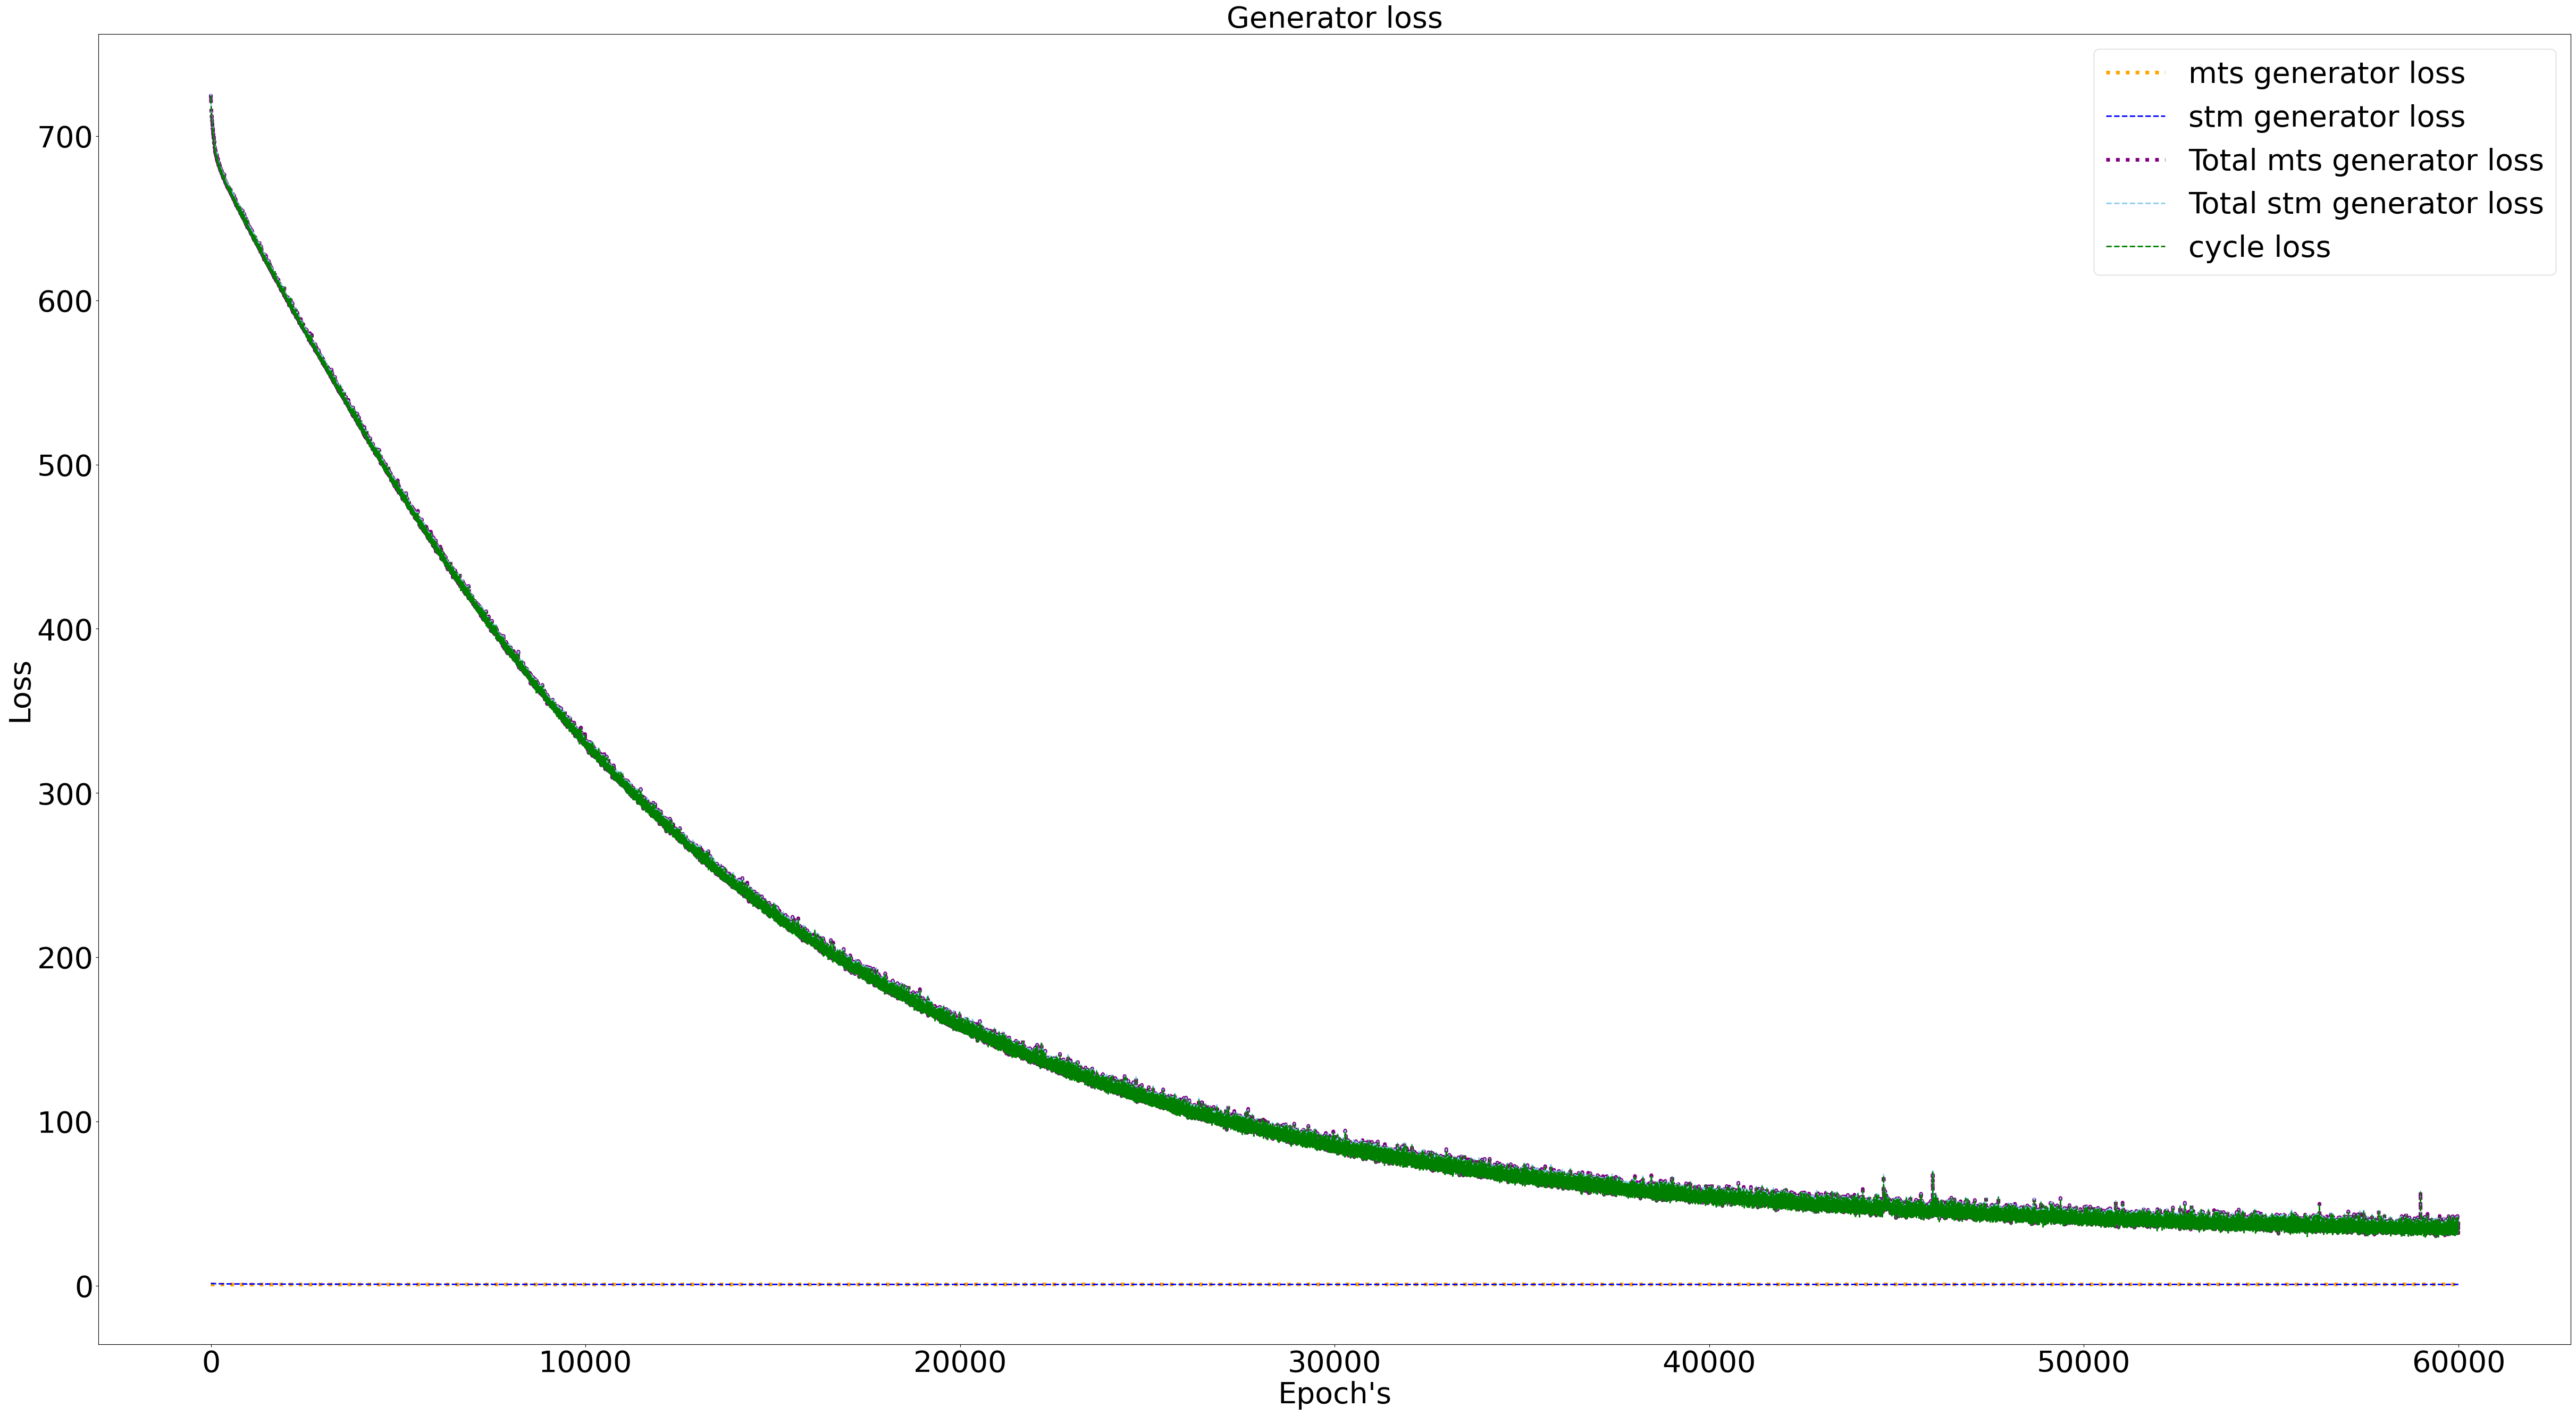

In [66]:
name_g_loss = "MSE_generator_loss_epoch_lambda_" + str(LAMBDA)+ "_" + str(EPOCHS) + "_epochs.png"
fig = plt.gcf()
fig.set_size_inches(60, 32)
plt.plot(mts_gen_epoch_list, color = "orange", 
         linestyle = "dotted", linewidth = 5, label = "mts generator loss")
plt.plot(stm_gen_epoch_list, color = "blue", 
         linestyle = "--", linewidth = 2, label = "stm generator loss")
plt.plot(total_mts_gen_epoch_list, color = "purple", 
         linestyle = "dotted", linewidth = 5, label = "Total mts generator loss")
plt.plot(total_stm_gen_epoch_list, color = "skyblue",
         linestyle = "--", linewidth = 2, label = "Total stm generator loss")
plt.plot(cycle_gen_epoch_list, color = "green",
         linestyle = "--", linewidth = 2, label = "cycle loss")

#加上標題
plt.title("Generator loss", fontsize = 40)
#加上圖例
plt.legend(loc = "best", fontsize = 40)
#加上x軸及y軸名稱
plt.xlabel("Epoch's", fontsize = 40)
plt.ylabel("Loss", fontsize = 40)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
plt.savefig(name_g_loss, transparent = True)
plt.show()

In [67]:
name_d_loss = "MSE_discrimnator_loss_batch_lambda_" + str(LAMBDA)+ "_" + str(EPOCHS) + "_epochs.png"
fig = plt.gcf()
fig.set_size_inches(60, 32)
plt.plot(micro_discriminator_batch_loss, color = "b",
         linestyle = "--", linewidth = 1, label = "Micro discriminator loss")
plt.plot(scRNA_discriminator_batch_loss, color = "r",
         linestyle = "solid", linewidth = 1, label = "scRNA discriminator loss")
#加上標題
plt.title("Discriminator loss", fontsize = 40)
#加上圖例
plt.legend(loc = "best", fontsize = 40)
#加上x軸及y軸名稱
plt.xlabel("Batch's", fontsize = 40)
plt.ylabel("Loss", fontsize = 40)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
plt.savefig(name_d_loss, transparent = True)
plt.show()

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 6000x3200 with 1 Axes>

In [36]:
micro_disc_sum = 0
scRNA_disc_sum = 0
micro_disc_epoch_list = []
scRNA_disc_epoch_list = []
n = 1
for i in range(len(micro_discriminator_batch_loss)):
    if n != 13:
        micro_disc_sum += micro_discriminator_batch_loss[i]
        scRNA_disc_sum += scRNA_discriminator_batch_loss[i]
        n += 1
    elif n == 13:
        micro_disc_sum += micro_discriminator_batch_loss[i]
        scRNA_disc_sum += scRNA_discriminator_batch_loss[i]
        micro_disc_epoch_list.append(micro_disc_sum/13)
        scRNA_disc_epoch_list.append(scRNA_disc_sum/13)
        n, micro_disc_sum , scRNA_disc_sum = 1, 0, 0

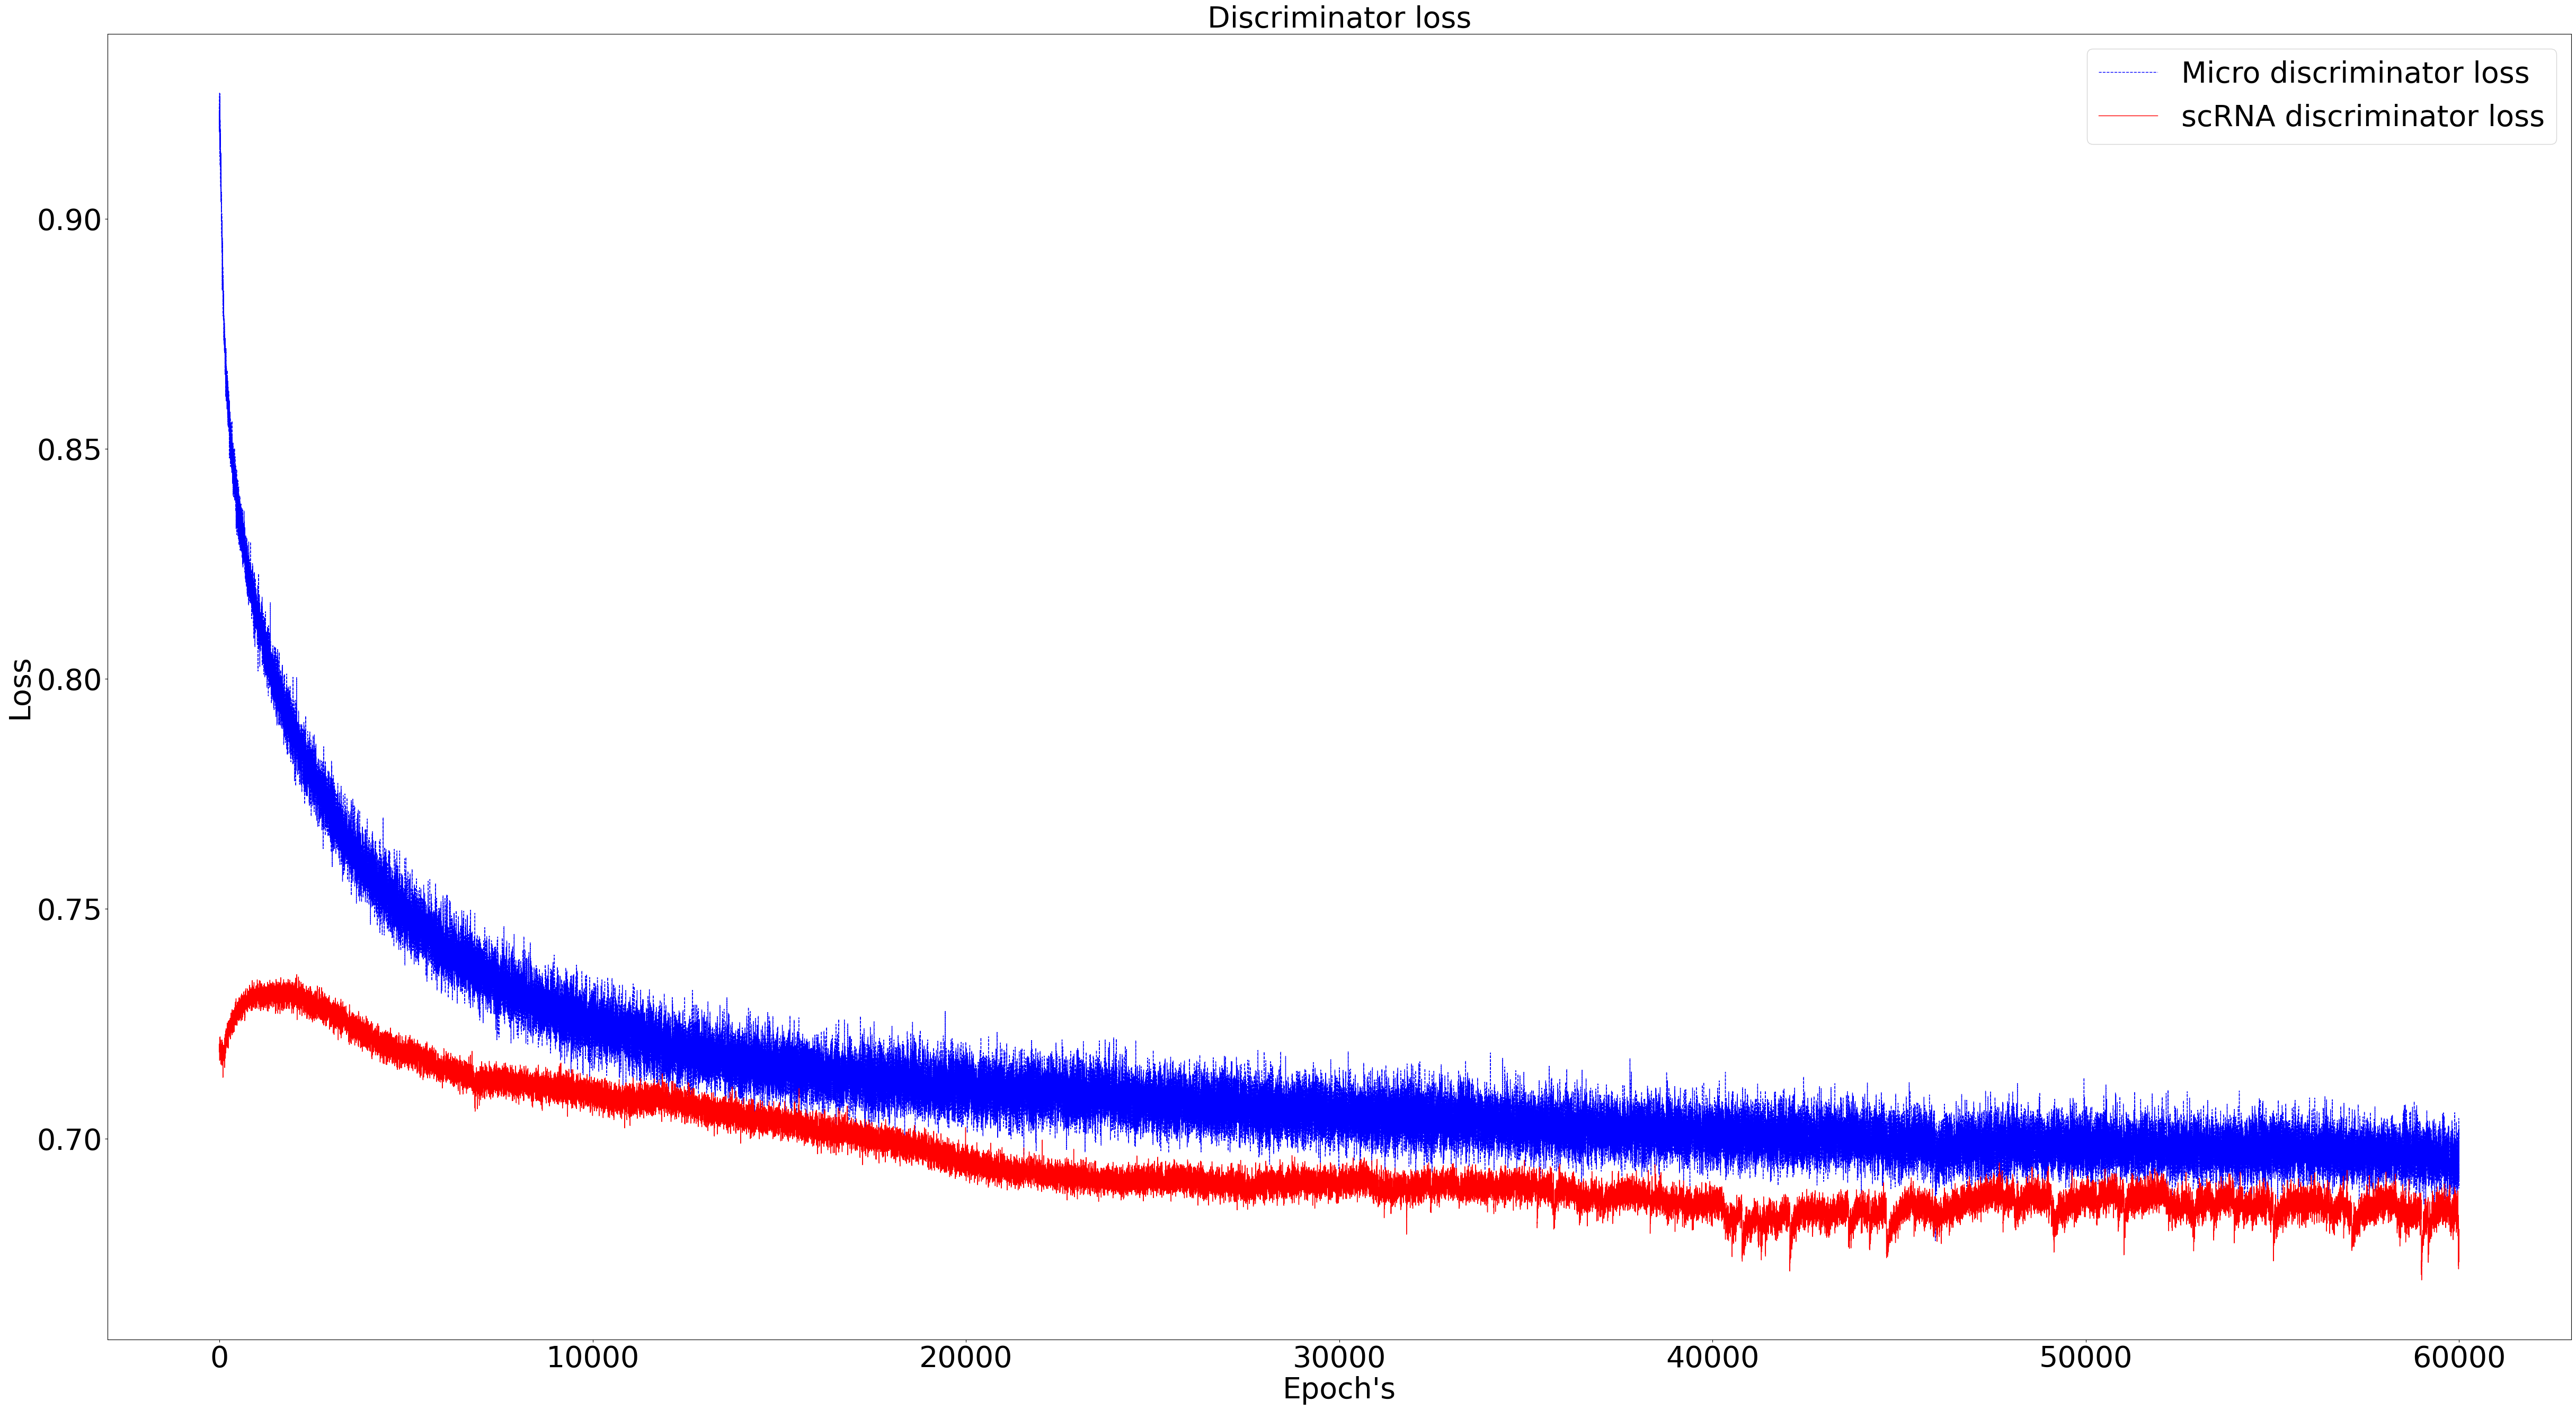

In [54]:
name_d_loss = "MSE_discrimnator_loss_epoch_lambda_" + str(LAMBDA)+ "_" + str(EPOCHS) + "_epochs.png"
fig = plt.gcf()
fig.set_size_inches(60, 32)
plt.plot(micro_disc_epoch_list, color = "B",
         linestyle = "--", linewidth = 1, label = "Micro discriminator loss")
plt.plot(scRNA_disc_epoch_list, color = "R",
         linestyle = "solid", linewidth = 1, label = "scRNA discriminator loss")
#加上標題
plt.title("Discriminator loss", fontsize = 40)
#加上圖例
plt.legend(loc = "best", fontsize = 40)
#加上x軸及y軸名稱
plt.xlabel("Epoch's", fontsize = 40)
plt.ylabel("Loss", fontsize = 40)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
plt.savefig(name_d_loss, transparent = True)
plt.show()

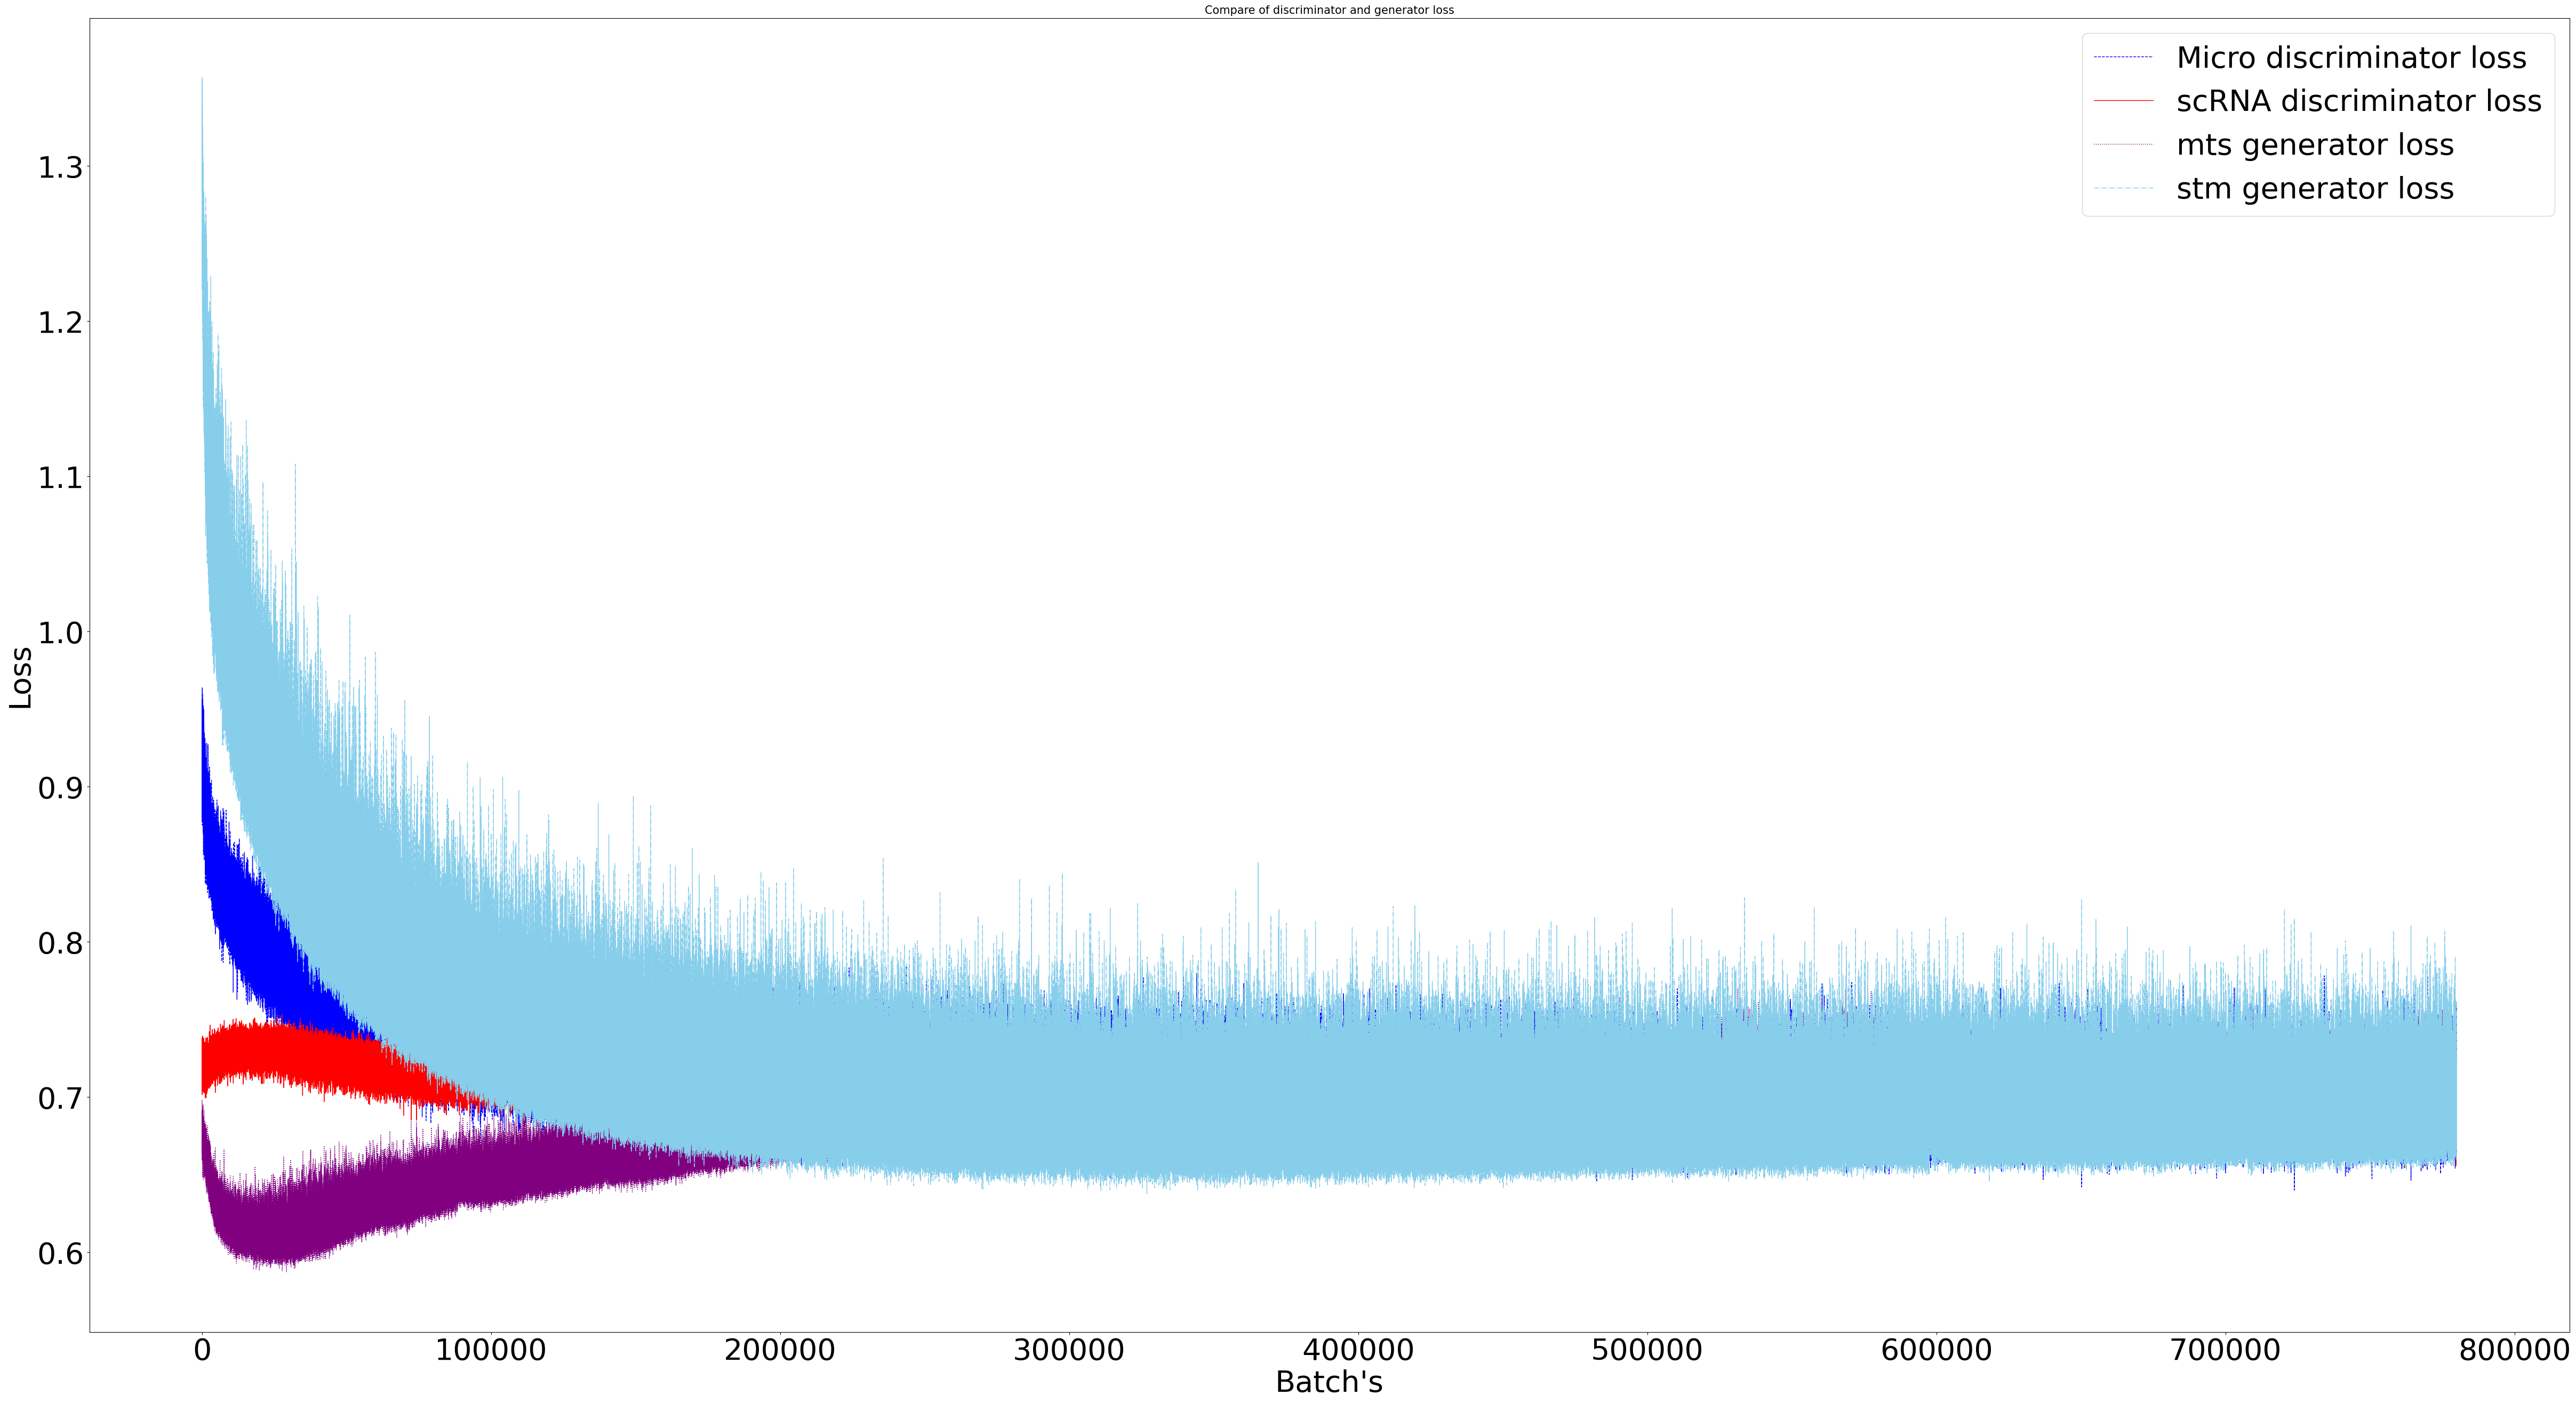

In [55]:
name_d_loss = "MSE_compare_loss_batch_lambda_" + str(LAMBDA)+ "_" + str(EPOCHS) + "_epochs.png"
fig = plt.gcf()
fig.set_size_inches(60, 32)
plt.plot(micro_discriminator_batch_loss, color = "blue",
         linestyle = "--", linewidth = 1, label = "Micro discriminator loss")
plt.plot(scRNA_discriminator_batch_loss, color = "red",
         linestyle = "solid", linewidth = 1, label = "scRNA discriminator loss")
plt.plot(mts_generator_batch_loss, color = "purple", 
         linestyle = "dotted", linewidth = 1, label = "mts generator loss")
plt.plot(stm_generator_batch_loss, color = "skyblue",
         linestyle = "-.", linewidth = 1, label = "stm generator loss")
#加上標題
plt.title("Compare of discriminator and generator loss", fontsize = 15)
#加上圖例
plt.legend(loc = "best", fontsize = 40)
#加上x軸及y軸名稱
plt.xlabel("Batch's", fontsize = 40)
plt.ylabel("Loss", fontsize = 40)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
plt.savefig(name_d_loss, transparent = True)
plt.show()

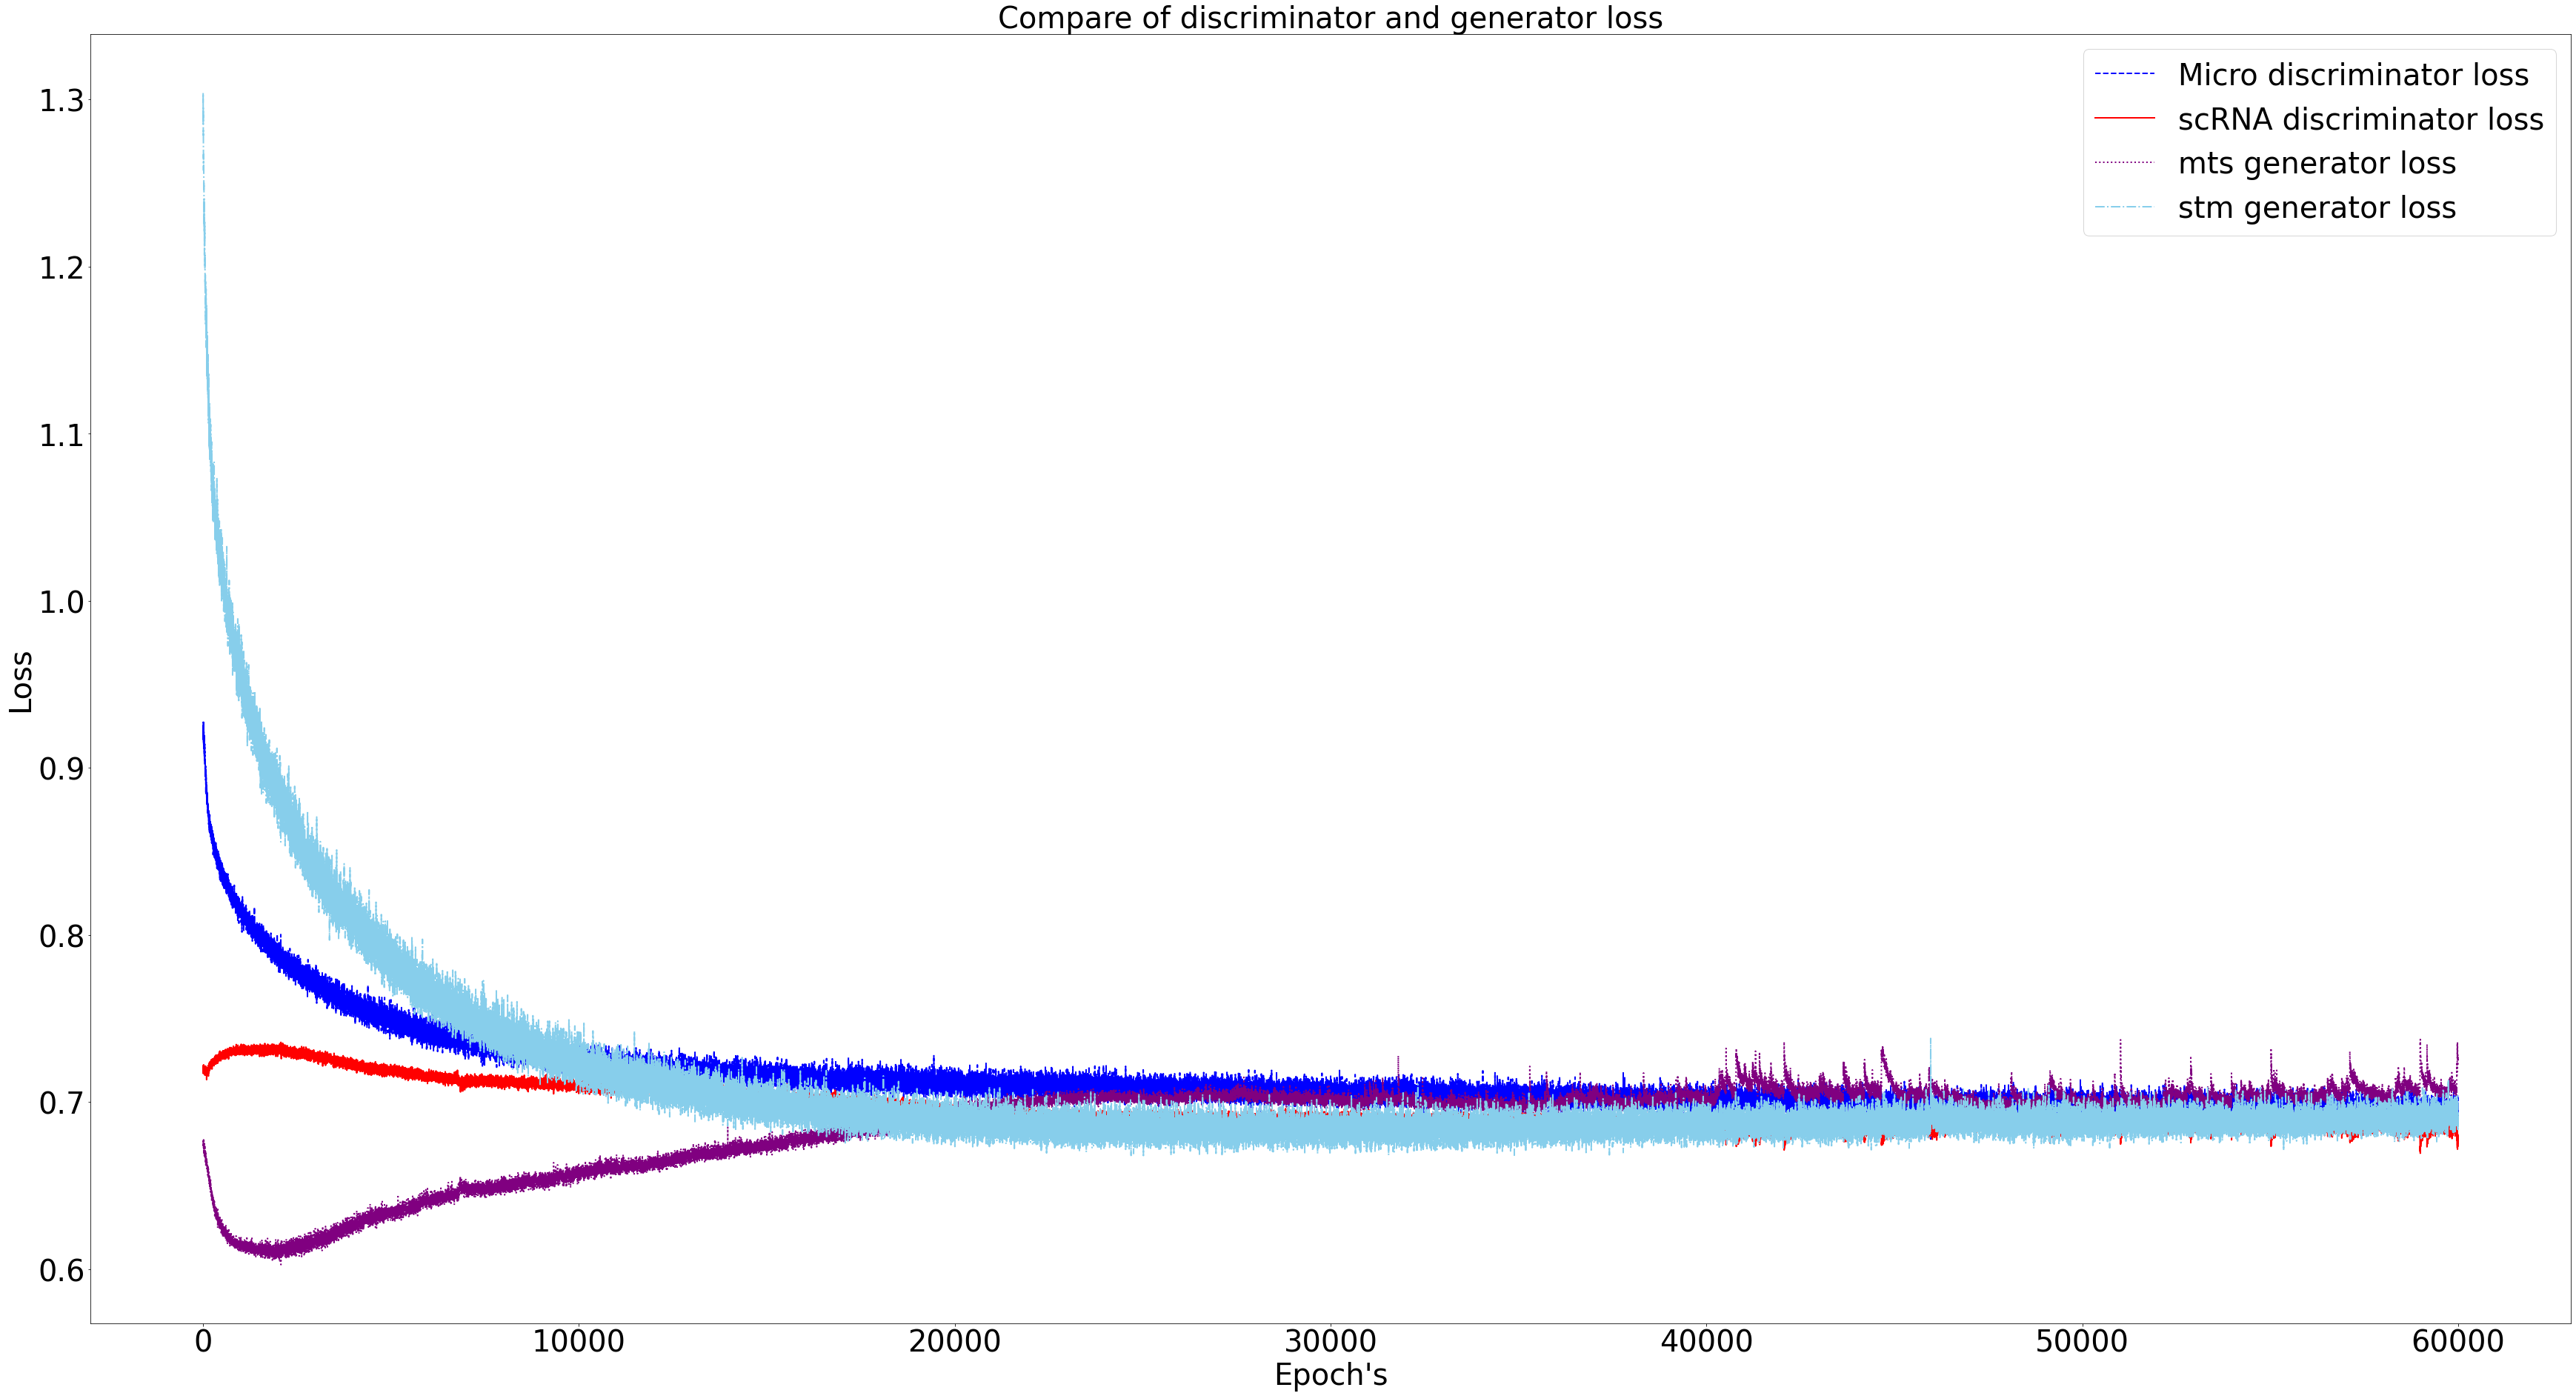

In [47]:
name_d_loss = "MSE_compare_loss_epoch_lambda_" + str(LAMBDA)+ "_" + str(EPOCHS) + "_epochs.png"
fig = plt.gcf()
fig.set_size_inches(60, 32)
plt.plot(micro_disc_epoch_list, color = "blue",
         linestyle = "--", linewidth = 2, label = "Micro discriminator loss")
plt.plot(scRNA_disc_epoch_list, color = "red",
         linestyle = "solid", linewidth = 2, label = "scRNA discriminator loss")
plt.plot(mts_gen_epoch_list, color = "purple", 
         linestyle = "dotted", linewidth = 2, label = "mts generator loss")
plt.plot(stm_gen_epoch_list, color = "skyblue",
         linestyle = "-.", linewidth = 2, label = "stm generator loss")
#加上標題
plt.title("Compare of discriminator and generator loss", fontsize = 40)
#加上圖例
plt.legend(loc = "best", fontsize = 40)
#加上x軸及y軸名稱
plt.xlabel("Epoch's", fontsize = 40)
plt.ylabel("Loss", fontsize = 40)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
plt.savefig(name_d_loss, transparent = True)
plt.show()

In [58]:
name_d_acc = "MSE_discrimnator_accucary_batch_lambda_" + str(LAMBDA)+ "_" + str(EPOCHS) + "_epochs.png"
fig = plt.gcf()
fig.set_size_inches(60, 32)
plt.plot(micro_discriminator_fake_accuacry, color = "R",
         linestyle = "--", linewidth = 1, label = "Micro discriminator fake")
plt.plot(micro_discriminator_real_accuacry, color = "B",
         linestyle = "solid", linewidth = 1, label = "Micro discriminator real")
plt.plot(scRNA_discriminator_fake_accuacry, color = "green",
         linestyle = "dotted", linewidth = 1, label = "scRNA discriminator fake")
plt.plot(scRNA_discriminator_real_accuacry, color = "black",
         linestyle = "-.", linewidth = 1, label = "scRNA discriminator real")
#加上標題
plt.title("Discriminator accucary", fontsize = 40)
#加上圖例
plt.legend(loc = "best", fontsize = 40)
#加上x軸及y軸名稱
plt.xlabel("Batch's", fontsize = 40)
plt.ylabel("Accucary", fontsize = 40)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
plt.savefig(name_d_acc, transparent = True)
plt.show()

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 6000x3200 with 1 Axes>

In [57]:
import matplotlib
matplotlib.rcParams['agg.path.chunksize'] = 1000000

matplotlib.rcParams.update(matplotlib.rc_params())



In [52]:
micro_disc_real_acc_sum = 0
micro_disc_fake_acc_sum = 0
scRNA_disc_real_acc_sum = 0
scRNA_disc_fake_acc_sum = 0
micro_disc_real_acc_epoch_list = []
micro_disc_fake_acc_epoch_list = []
scRNA_disc_real_acc_epoch_list = []
scRNA_disc_fake_acc_epoch_list = []
n = 1
for i in range(len(micro_discriminator_batch_loss)):
    if n != 13:
        micro_disc_real_acc_sum += micro_discriminator_real_accuacry[i]
        micro_disc_fake_acc_sum += micro_discriminator_fake_accuacry[i]
        scRNA_disc_real_acc_sum += scRNA_discriminator_real_accuacry[i]
        scRNA_disc_fake_acc_sum += scRNA_discriminator_fake_accuacry[i]
        n += 1
    elif n == 13:
        micro_disc_real_acc_sum += micro_discriminator_real_accuacry[i]
        micro_disc_fake_acc_sum += micro_discriminator_fake_accuacry[i]
        scRNA_disc_real_acc_sum += scRNA_discriminator_real_accuacry[i]
        scRNA_disc_fake_acc_sum += scRNA_discriminator_fake_accuacry[i]
        
        micro_disc_real_acc_epoch_list.append(micro_disc_real_acc_sum/13)
        micro_disc_fake_acc_epoch_list.append(micro_disc_fake_acc_sum/13)
        scRNA_disc_real_acc_epoch_list.append(scRNA_disc_real_acc_sum/13)
        scRNA_disc_fake_acc_epoch_list.append(scRNA_disc_fake_acc_sum/13)
        (n, micro_disc_real_acc_sum, micro_disc_fake_acc_sum, 
         scRNA_disc_real_acc_sum, scRNA_disc_fake_acc_sum) = 1, 0, 0, 0, 0
        

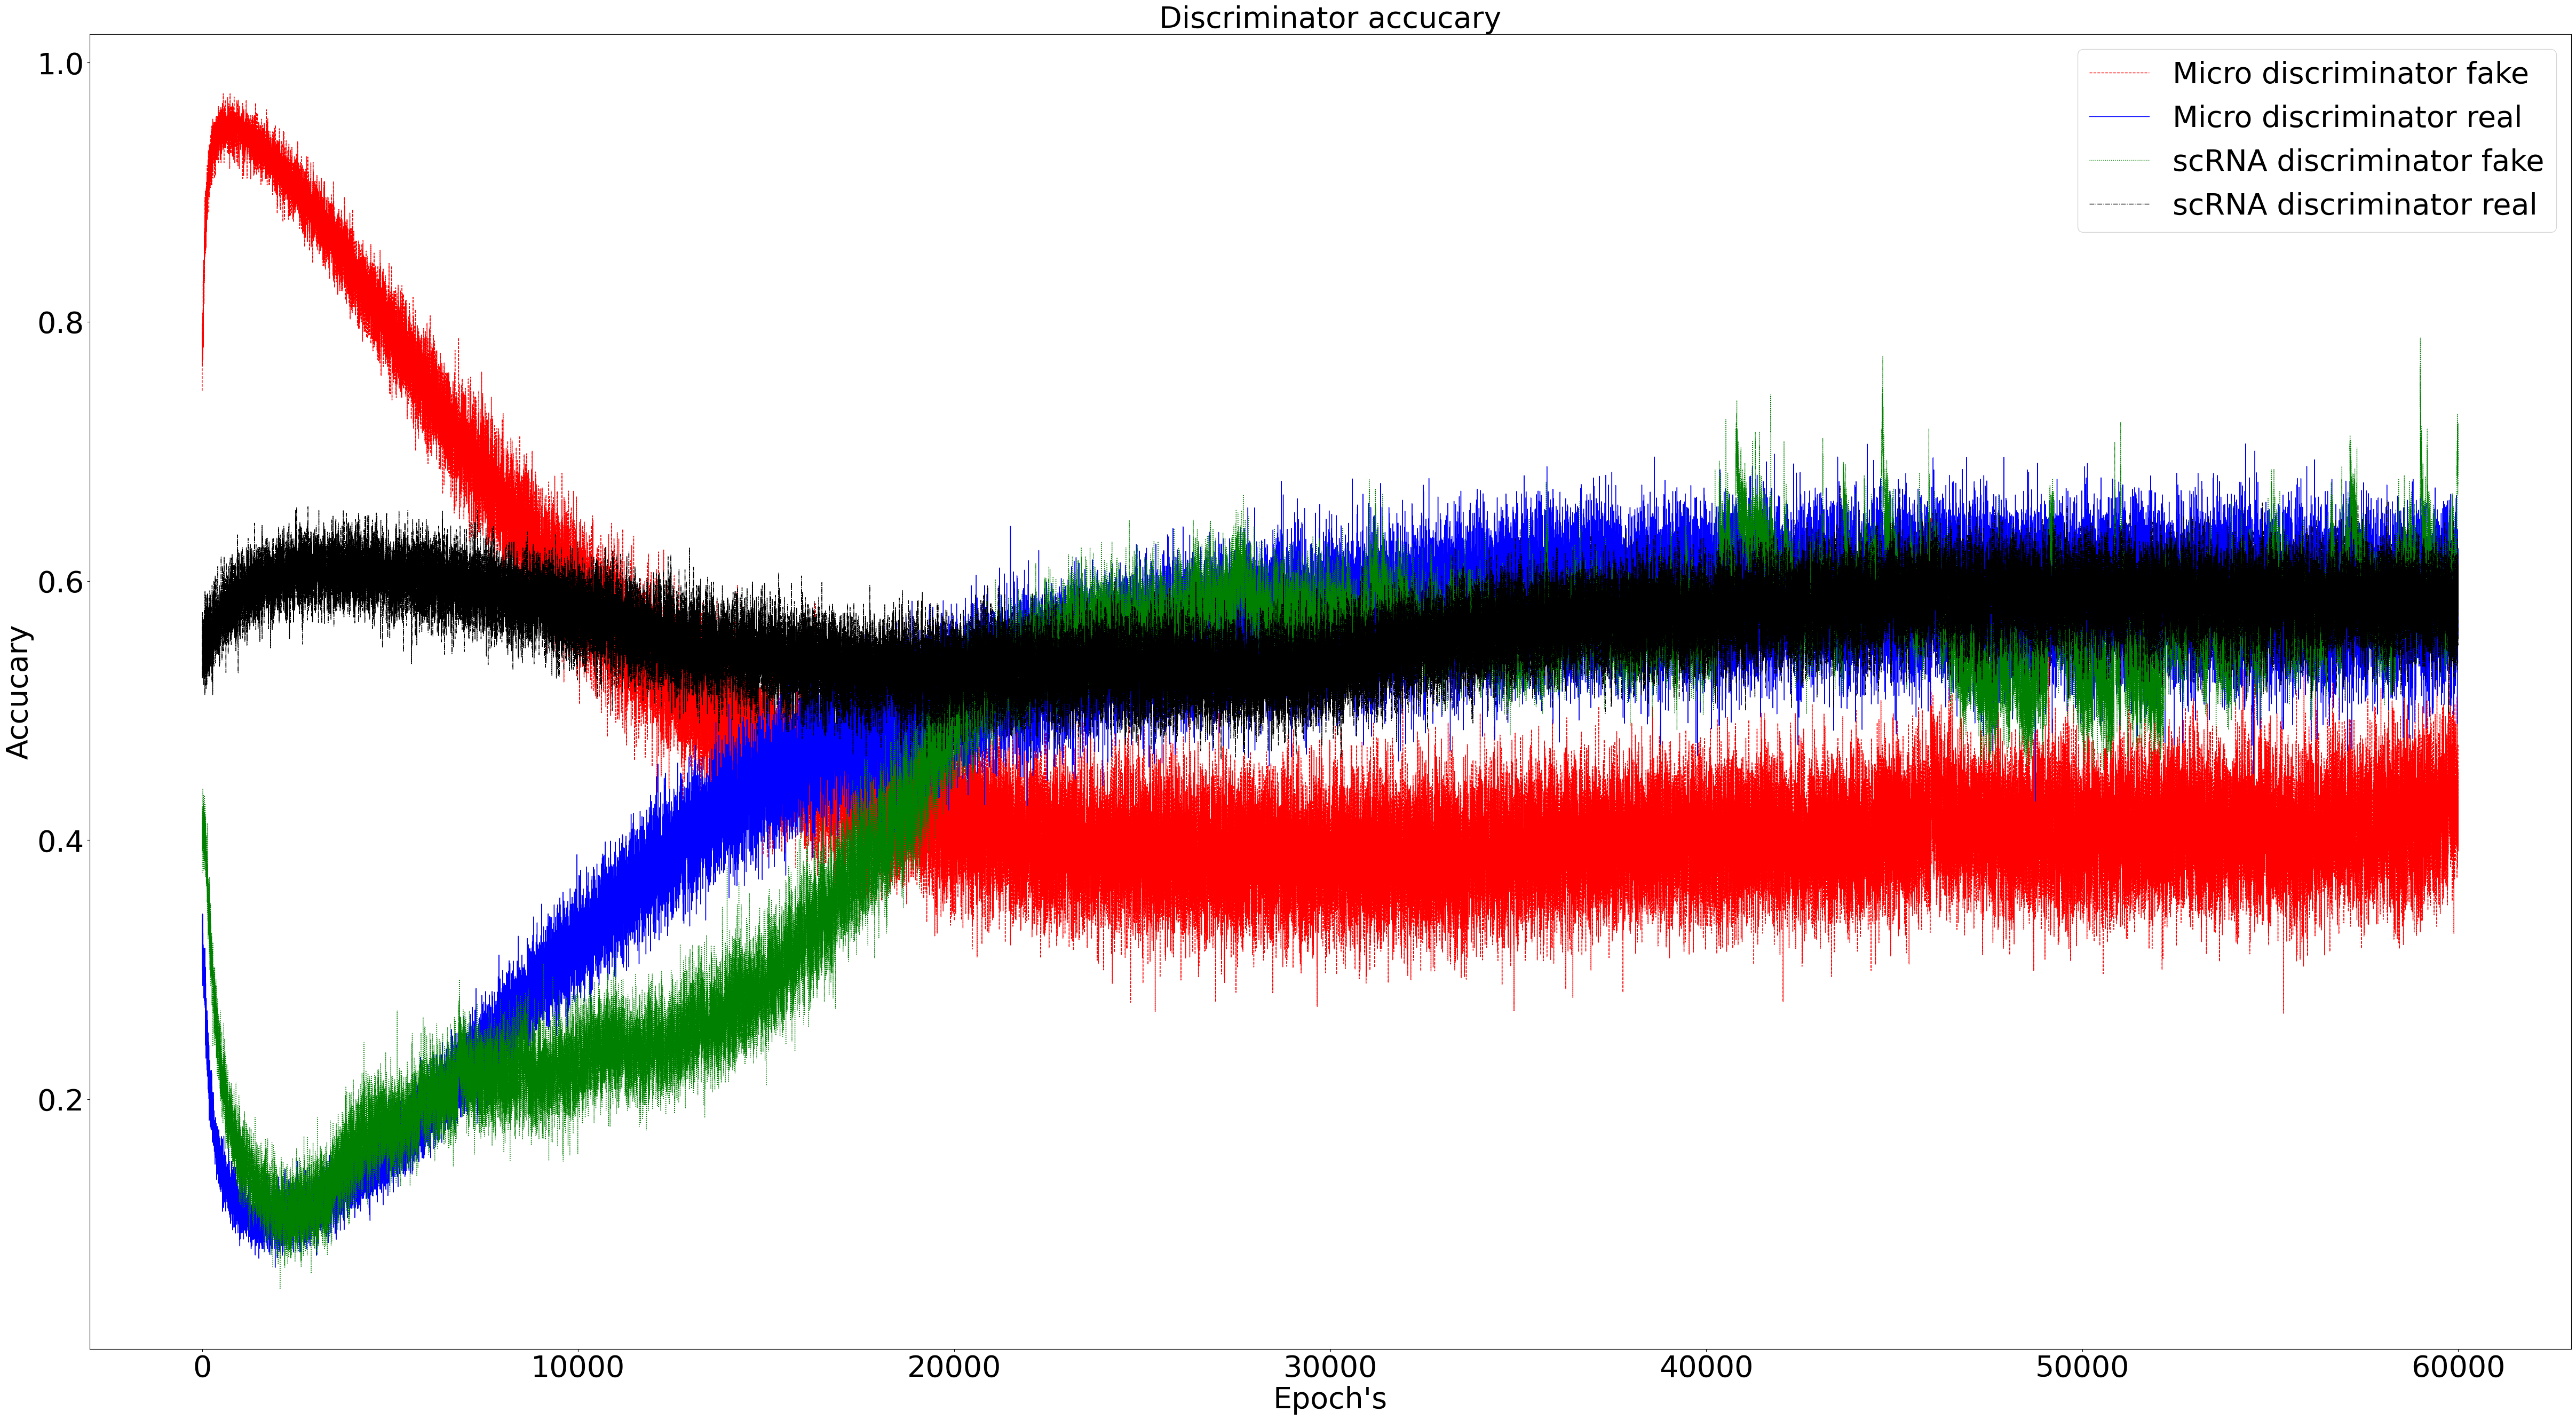

In [53]:
name_d_acc = "MSE_discrimnator_accucary_epoch_lambda_" + str(LAMBDA)+ "_" + str(EPOCHS) + "_epochs.png"
fig = plt.gcf()
fig.set_size_inches(60, 32)
plt.plot(micro_disc_fake_acc_epoch_list, color = "R",
         linestyle = "--", linewidth = 1, label = "Micro discriminator fake")
plt.plot(micro_disc_real_acc_epoch_list, color = "B",
         linestyle = "solid", linewidth = 1, label = "Micro discriminator real")
plt.plot(scRNA_disc_fake_acc_epoch_list, color = "green",
         linestyle = "dotted", linewidth = 1, label = "scRNA discriminator fake")
plt.plot(scRNA_disc_real_acc_epoch_list, color = "black",
         linestyle = "-.", linewidth = 1, label = "scRNA discriminator real")
#加上標題
plt.title("Discriminator accucary", fontsize = 40)
#加上圖例
plt.legend(loc = "best", fontsize = 40)
#加上x軸及y軸名稱
plt.xlabel("Epoch's", fontsize = 40)
plt.ylabel("Accucary", fontsize = 40)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
plt.savefig(name_d_acc, transparent = True)
plt.show()

In [62]:
file_name = "mtsGAN_lambda_" + str(LAMBDA) + "_lr_" + str(lr) + "_training_loss_last_epoch_history.csv"
with open(file_name, "w") as outfile:
    outfile.write("{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}\n".format("Total_mts_generator_loss",
                                                                        "Total_stm_generator_loss",
                                                                        "mts_generator_loss",
                                                                        "stm_generator_loss",
                                                                        "Cycle_loss",
                                                                        "Micro_discriminator_loss",
                                                                        "scRNA_discriminator_loss",
                                                                        "Micro_discriminator_real_accucary",
                                                                        "Micro_discriminator_fake_accucary",
                                                                        "scRNA_discriminator_real_accucary",
                                                                        "scRNA_discriminator_fake_accucary"))
    outfile.write("{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}\n".format(total_mts_gen_epoch_list[-1],
                                                                        total_stm_gen_epoch_list[-1],
                                                                        mts_gen_epoch_list[-1],
                                                                        stm_gen_epoch_list[-1],
                                                                        cycle_gen_epoch_list[-1],
                                                                        micro_disc_epoch_list[-1],
                                                                        scRNA_disc_epoch_list[-1],
                                                                        micro_disc_real_acc_epoch_list[-1],
                                                                        micro_disc_fake_acc_epoch_list[-1],
                                                                        scRNA_disc_real_acc_epoch_list[-1],
                                                                        scRNA_disc_fake_acc_epoch_list[-1]))

In [68]:
file_name = "mtsGAN_lambda_" + str(LAMBDA) + "_lr_" + str(lr) + "_all_training_loss_last_epoch_history.csv"
with open(file_name, "w") as outfile:
    outfile.write("{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}\n".format("Epoch",
                                                                            "Total_mts_generator_loss",
                                                                            "Total_stm_generator_loss",
                                                                            "mts_generator_loss",
                                                                            "stm_generator_loss",
                                                                            "Cycle_loss",
                                                                            "Micro_discriminator_loss",
                                                                            "scRNA_discriminator_loss",
                                                                            "Micro_discriminator_real_accucary",
                                                                            "Micro_discriminator_fake_accucary",
                                                                            "scRNA_discriminator_real_accucary",
                                                                            "scRNA_discriminator_fake_accucary"))
    for i in range(0, len(total_mts_gen_epoch_list)):
        outfile.write("{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}\n".format(i,
                                                                                total_mts_gen_epoch_list[i],
                                                                                total_stm_gen_epoch_list[i],
                                                                                mts_gen_epoch_list[i],
                                                                                stm_gen_epoch_list[i],
                                                                                cycle_gen_epoch_list[i],
                                                                                micro_disc_epoch_list[i],
                                                                                scRNA_disc_epoch_list[i],
                                                                                micro_disc_real_acc_epoch_list[i],
                                                                                micro_disc_fake_acc_epoch_list[i],
                                                                                scRNA_disc_real_acc_epoch_list[i],
                                                                                scRNA_disc_fake_acc_epoch_list[i]))